In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy.stats import pearsonr
%matplotlib inline

In [6]:
dataset = pd.read_csv("toehold_data.csv")
dataset.head()

,GC_stem_top,GC_stem_bottom,preRBS_length,toehold_length,MFE,AU_rich_RBS,on_off_ed
0,0,2,12,27,-19.8,1,264.6
1,0,2,9,26,-23.7,0,192.4
2,1,2,7,22,-22.5,1,153.4
3,0,3,4,16,-20.7,1,44.7
4,3,1,5,16,-23.2,1,40.5


In [7]:
X = dataset.drop(['on_off_ed'],axis=1)
Y = dataset['on_off_ed']

X.describe()

,GC_stem_top,GC_stem_bottom,preRBS_length,toehold_length,MFE,AU_rich_RBS
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,1.204420,1.679558,3.745856,11.883978,-23.422652,0.458564
std,1.119118,1.073453,2.654461,6.604108,2.438553,0.499662
min,0.000000,0.000000,1.000000,5.000000,-28.800000,0.000000
25%,0.000000,1.000000,2.000000,7.000000,-25.200000,0.000000
50%,1.000000,2.000000,3.000000,10.000000,-23.200000,0.000000
75%,2.000000,3.000000,5.000000,15.000000,-21.500000,1.000000
max,3.000000,3.000000,12.000000,30.000000,-18.700000,1.000000


In [9]:
Y.describe()

count    181.000000
mean      67.382875
std      118.489079
min        0.600400
25%        6.800000
50%       19.900000
75%       57.100000
max      665.000000
Name: on_off_ed, dtype: float64

In [11]:
for column in X:
    corr,_ = pearsonr(X[column],Y)
    print(column,corr)

GC_stem_top -0.2553426188803812
GC_stem_bottom 0.09772620458112644
preRBS_length 0.8414216549637648
toehold_length 0.7171234946697403
MFE 0.4880947012058683
AU_rich_RBS 0.26532521371804946


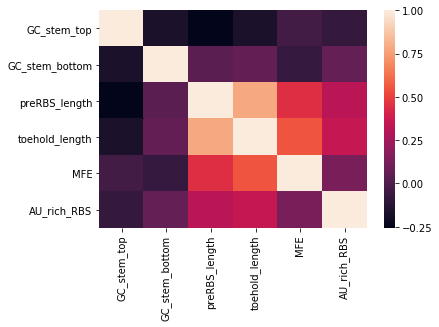

In [15]:
corr = X.corr()
seabornInstance.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)
print(regressor.coef_)
corr,_ = pearsonr(X['GC_stem_top'],Y)
corr

[-5.75270348  7.04842524 31.42472822  1.88136422  6.24080944 -6.65151691]


-0.2553426188803812

In [13]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual ON/OFF': y_test, 'Predicted ON/OFF': y_pred})
first15 = df.head(15)
print(first15)




df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared Value: ",metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

NameError: name 'y_test' is not defined